In [ ]:
#Loading all the necessary libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset and printing the data
df=pd.read_csv("/content/sample_data/brfss2020.csv")
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,1042020.0,1.0,4.0,2020.0,1100.0,2.020000e+09,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,2072020.0,2.0,7.0,2020.0,1200.0,2.020000e+09,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1.0,1.0,1232020.0,1.0,23.0,2020.0,1100.0,2.020000e+09,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1.0,1.0,1092020.0,1.0,9.0,2020.0,1100.0,2.020000e+09,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1.0,1.0,1042020.0,1.0,4.0,2020.0,1100.0,2.020000e+09,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [ ]:
df_rel1=df[['_STATE',
'SEXVAR',
'_PHYS14D',
'HLTHPLN1',
'EXERANY2',
'SLEPTIM1',
'_MICHD',
'CVDSTRK3',
'DIABETE4',
'VETERAN3',
'INCOME2',
'SMOKE100',
'DRNK3GE5',
'CNCRDIFF',
'CNCRTYP1',
'_IMPRACE',
'_BMI5',
'_BMI5CAT',
'_SMOKER3',
]]

In [ ]:
#length before any clean up
print('Total Data:', len(df_rel1))

Total Data: 37408


# DATA CLEANING PROCESS

In [ ]:
#Dropping values depending on the variable as each variables has different criteria for dropping
values = [77,88,99]
val1 = [7,9]
val2 = [77,99]

####--------------------PHYS14D: Computed Physical Health Status-----------------------------
#1: Zero days when physical health not good
#2: 1-13 days when physical health not good
#3: 14+ days when physical health not good
#9: Don't know

#Checking the value counts for those value label brackets
print("Value count of _PHYS14D: \n",df_rel1['_PHYS14D'].value_counts())

#Dropping blanks 
df_rel1.dropna(subset=['_PHYS14D'], inplace=True)

#dropping values of 9
df_rel1 = df_rel1[df_rel1['_PHYS14D'].isin(val1) == False]

print("Length of dataframe after cleaning up _PHYS14D : ", len(df_rel1))

#--------------------HLTHPLN1: Have any health care coverage------------------------------------
#1- Yes
#2-No
#7-Dont Know/ Not Sure
#9-Refused
#BLANK: Not asked or missing

#Dropping blanks
df_rel1.dropna(subset=['HLTHPLN1'], inplace=True)

#dropping any values that is NOT 1,2
df_rel1 = df_rel1[df_rel1['HLTHPLN1'].isin(val1) == False]

#Converting 2 to 0
df_rel1['HLTHPLN1'] = df_rel1['HLTHPLN1'].replace({2:0})
print("Length of dataframe after cleaning up HLTHPLN1 : ",len(df_rel1))


#--------------------EXERANY2:Exercise in Past 30 Days--------------------------------------------
#1:Yes
#2:No
#7: Not sure
#9: Refused
#BLANK: Not asked or Missing

#Dropping blanks
df_rel1.dropna(subset=['EXERANY2'], inplace=True)


#Converting 2 to 0
df_rel1['EXERANY2'] = df_rel1['EXERANY2'].replace({2:0})

df_rel1 = df_rel1[df_rel1['EXERANY2'].isin(val1) == False]
print("Length of dataframe after cleaning up EXERANY2 : ",len(df_rel1))

#--------------SLEPTIM1: How Much Time Do You Sleep-----------------------------------------------
#1-24: No of hours
#77-Don't know/ Not sure
#99-Refused
#BLANK: Missing

#dropping blanks
df_rel1.dropna(subset=['SLEPTIM1'], inplace=True)

#drop any value of 77, 99
df_rel1 = df_rel1[df_rel1['SLEPTIM1'].isin(values) == False]
print("Length of dataframe after cleaning up SLEPTIM1 : ",len(df_rel1))

#----------------------------_MICHD:Ever had a coronary heart disease or myocardial infarction----------
#1:Yes
#2:No
#BLANK: Not asked or Missing

#Filling blanks with 0
df_rel1['_MICHD']=df_rel1['_MICHD'].fillna(0)

#Converting 2 to 0
df_rel1['_MICHD'] = df_rel1['_MICHD'].replace({2:0})

#Dropping values not required
df_rel1 = df_rel1[df_rel1['_MICHD'].isin(val1) == False]
print("Length of dataframe after cleaning up _MICHD : ",len(df_rel1))


#---------------------------------CVDSTRK3:Ever Diagnosed with a Stroke---------------------------
#1:Yes
#2:No
#7: Not sure
#9: Refused
#BLANK: Not asked or Missing
df_rel1.dropna(subset=['CVDSTRK3'], inplace=True)

#Converting 2 to 0
df_rel1['CVDSTRK3'] = df_rel1['CVDSTRK3'].replace({2:0})

df_rel1 = df_rel1[df_rel1['CVDSTRK3'].isin(val1) == False]
print("Length of dataframe after cleaning up CVDSTRK3 : ",len(df_rel1))

#---------------------DIABETE4:(Ever told) you had diabetes----------------------------------------
#1:Yes
#2:Yes, but female told only during pregnancy
#3: No
#4: No, pre-diabetes or borderline
#7: Not sure
#9: Refused
#BLANK: Not asked or Missing

#Dropping blank values
df_rel1.dropna(subset=['DIABETE4'], inplace=True)

# Going to make this ordinal. 0 is for no diabetes or only during pregnancy,
#1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes

df_rel1['DIABETE4'] = df_rel1['DIABETE4'].replace({2:0, 3:0, 1:2, 4:1})

df_rel1 = df_rel1[df_rel1['DIABETE4'].isin(val1) == False]
print("Length of dataframe after cleaning up DIABETE4 : ",len(df_rel1))


#--------------------VETERAN3: Are You A Veteran-----------------------------------------------
#1:Yes
#2:No
#7: Not sure
#9: Refused
#BLANK: Not asked or Missing

#Dropping blank values
df_rel1.dropna(subset=['VETERAN3'], inplace=True)

#Converting 2 to 0
df_rel1['VETERAN3'] = df_rel1['VETERAN3'].replace({2:0})

df_rel1 = df_rel1[df_rel1['VETERAN3'].isin(val1) == False]
print("Length of dataframe after cleaning up VETERAN3 : ",len(df_rel1))

#-------------------INCOME2:Income Level-----------------------------------------------------
# 1: Less than 10K
# 2: Between 10-15K
# 3: Between 15-20K
# 4: Between 20-25K
# 5: Between 25-35K
# 6: Between 35-50K
# 7: Between 50-75K
# 8: More than 75K
# 77: Don't know
# 99: Refused
#BLANK: Not asked or Missing

#dropping blank values
df_rel1.dropna(subset=['INCOME2'], inplace=True)

#drop any value of 77, 99
df_rel1 = df_rel1[df_rel1['INCOME2'].isin(values) == False]
print("Length of dataframe after cleaning up INCOME2 : ",len(df_rel1))

#---------------------SMOKE100: Smoked at Least 100 Cigarettes---------------------------------------
#1:Yes
#2:No
#7: Not sure
#9: Refused
#BLANK: Not asked or Missing

df_rel1.dropna(subset=['SMOKE100'], inplace=True)

#Converting 2 to 0
df_rel1['SMOKE100'] = df_rel1['SMOKE100'].replace({2:0})
df_rel1 = df_rel1[df_rel1['SMOKE100'].isin(val1) == False]
print("Length of dataframe after cleaning up SMOKE100 : ",len(df_rel1))

#------------------------DRNK3GE5: Binge Drinking----------------------------------------------------
#1-76: Number of Times
#88: None
#77: Don’t know/Not Sure
#99: Refused
#BLANK: Not asked or Missing

#do not need 77, 99 BUT need 88
df_rel1.dropna(subset=['DRNK3GE5'], inplace=True)

#Converting 88 to 0
df_rel1['DRNK3GE5'] = df_rel1['DRNK3GE5'].replace({88:0})

df_rel1 = df_rel1[df_rel1['DRNK3GE5'].isin(val2) == False]
print("Length of dataframe after cleaning up DRNK3GE5 : ",len(df_rel1))

#-------------------CNCRDIFF: How Many Types of Cancer?-------------------------------------------
# 1: 1 only
# 2: 2
# 3: 3 or more
# 7: Don’t know/Not Sure
# 9: Refused
# BLANK: Not asked or Missing


df_rel1['CNCRDIFF']=df_rel1['CNCRDIFF'].fillna(0)
df_rel1 = df_rel1[df_rel1['CNCRDIFF'].isin(val1) == False]
print("Length of dataframe after cleaning up CNCRDIFF : ",len(df_rel1))

#-------------------CNCRTYP1: Type of Cancer--------------------------------------------------

df_rel1['CNCRTYP1']=df_rel1['CNCRTYP1'].fillna('')

#dropping values of 77, 99
df_rel1 = df_rel1[df_rel1['CNCRTYP1'].isin(values) == False]
print("Length of dataframe after cleaning up CNCRTYP1 : ",len(df_rel1))

#--------------_BMI5CAT: Computed body mass index categories------------------------------------
#1: Underweight
#2: Normal weight
#3: Overweight
#4: Obese

#Dropping blanks
df_rel1.dropna(subset=['_BMI5CAT'], inplace=True)
print("Length of dataframe after cleaning up _BMI5CAT : ",len(df_rel1))


#--------------_SMOKER3: Computed Smoking Status---------------------------------------------
#1: Current smoker- smokes everyday
#2: Current smoker- smokes some days
#3: Former smoker
#4: Never smoked
#9: Don't know/ Missing

#Dropping blanks
df_rel1.dropna(subset=['_SMOKER3'], inplace=True)


df_rel1['_SMOKER3'] = df_rel1['_SMOKER3'].replace({1:3, 3:1, 4:0})
df_rel1 = df_rel1[df_rel1['_SMOKER3'].isin(val1) == False]
print("Length of dataframe after cleaning up _SMOKER3 : ",len(df_rel1))

Value count of _PHYS14D: 
 1.0    25083
2.0     7140
3.0     4335
9.0      849
Name: _PHYS14D, dtype: int64
Length of dataframe after cleaning up _PHYS14D :  36558
Length of dataframe after cleaning up HLTHPLN1 :  36361
Length of dataframe after cleaning up EXERANY2 :  36323
Length of dataframe after cleaning up SLEPTIM1 :  36030
Length of dataframe after cleaning up _MICHD :  36030
Length of dataframe after cleaning up CVDSTRK3 :  35941
Length of dataframe after cleaning up DIABETE4 :  35896
Length of dataframe after cleaning up VETERAN3 :  35662
Length of dataframe after cleaning up INCOME2 :  29384


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-5-d6a1591ac522>:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel1['SMOKE100'] = df_rel1['SMOKE100'].replace({2:0})


Length of dataframe after cleaning up SMOKE100 :  28507
Length of dataframe after cleaning up DRNK3GE5 :  14574
Length of dataframe after cleaning up CNCRDIFF :  14563
Length of dataframe after cleaning up CNCRTYP1 :  14530
Length of dataframe after cleaning up _BMI5CAT :  14056
Length of dataframe after cleaning up _SMOKER3 :  14050


In [ ]:
#Rename the columns to make them more readable

df_rel1.rename(columns = {'_STATE':'STATE',
'SEXVAR':'Sex',
'_PHYS14D':'PhysicalHealth',
'HLTHPLN1' :'HealthCare',
'EXERANY2' :'Exercise',
'SLEPTIM1':'SleepHours',
'_MICHD':'HeartAttack' ,
'CVDSTRK3':'Stroke',
'DIABETE4':'Diabetes',
'VETERAN3':'Veteran',
'INCOME2':'Income',
'SMOKE100':'Smoking',
'_SMOKER3':'SmokerType',
'DRNK3GE5':'BingeDrinking',
'CNCRDIFF':'Cancer',
'CNCRTYP1':'CancerType',
'_IMPRACE':'Race',
'_BMI5':'BMI', 
'_BMI5CAT': 'BMI_Bucket'}, inplace=True)

In [ ]:
#Creating bucketized values for some discrete variables
#df_rel1['Income_Bucket'] = pd.cut(df_rel1['Income'],[1,5,8])
#df_rel1['Binge_Drinking_Bucket'] = pd.cut(df_rel1['BingeDrinking'],[0,1,15,30,45,76])
#df_rel1['Sleep_Hours_Bucket'] = pd.cut(df_rel1['SleepHours'],[1,8,16,24])

In [ ]:
df_rel1.sample(5)

,STATE,Sex,PhysicalHealth,HealthCare,Exercise,SleepHours,HeartAttack,Stroke,Diabetes,Veteran,Income,Smoking,BingeDrinking,Cancer,CancerType,Race,BMI,BMI_Bucket,SmokerType
28415,6.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,,1.0,2106.0,2.0,0.0
27920,6.0,2.0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,,1.0,2663.0,3.0,0.0
34185,8.0,1.0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,,5.0,3396.0,4.0,1.0
4487,1.0,1.0,3.0,1.0,0.0,10.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,,1.0,2706.0,3.0,1.0
15001,4.0,2.0,2.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,,5.0,3067.0,4.0,2.0


In [ ]:
#Brief describe information about each variables
df_rel1.describe().head().T

,count,mean,std,min,25%
STATE,14050.0,4.833665,2.361703,1.0,4.0
Sex,14050.0,1.469537,0.499089,1.0,1.0
PhysicalHealth,14050.0,1.359573,0.623606,1.0,1.0
HealthCare,14050.0,0.917224,0.275553,0.0,1.0
Exercise,14050.0,0.841993,0.364761,0.0,1.0
SleepHours,14050.0,7.106975,1.305993,1.0,6.0
HeartAttack,14050.0,0.061779,0.240763,0.0,0.0
Stroke,14050.0,0.025267,0.156940,0.0,0.0
Diabetes,14050.0,0.178434,0.550895,0.0,0.0
Veteran,14050.0,0.146050,0.353169,0.0,0.0


In [ ]:
#correlation table
df_rel1.corr()

,STATE,Sex,PhysicalHealth,HealthCare,Exercise,SleepHours,HeartAttack,Stroke,Diabetes,Veteran,Income,Smoking,BingeDrinking,Cancer,Race,BMI,BMI_Bucket,SmokerType
STATE,1.000000,-0.012482,-0.023135,0.037577,0.069881,0.047770,-0.030622,-0.020539,-0.053724,-0.037522,0.069008,-0.048646,-0.014558,-0.066615,0.036732,-0.094692,-0.090249,-0.075318
Sex,-0.012482,1.000000,0.054865,0.061628,-0.028006,0.015756,-0.096886,-0.010619,-0.048963,-0.308721,-0.041887,-0.083115,-0.100543,-0.005625,-0.031742,-0.063696,-0.101713,-0.062654
PhysicalHealth,-0.023135,0.054865,1.000000,0.011260,-0.176096,-0.055099,0.141699,0.088258,0.101846,0.021381,-0.180176,0.081393,0.022868,0.038824,-0.000138,0.098271,0.072387,0.095851
HealthCare,0.037577,0.061628,0.011260,1.000000,0.045492,0.030739,0.024515,0.008864,0.033066,0.054751,0.217828,-0.058886,-0.099682,0.040071,-0.140626,-0.020839,-0.019384,-0.109578
Exercise,0.069881,-0.028006,-0.176096,0.045492,1.000000,0.005452,-0.095518,-0.053351,-0.103744,-0.018106,0.183708,-0.109335,-0.059897,-0.021329,-0.036526,-0.133636,-0.100296,-0.146905
SleepHours,0.047770,0.015756,-0.055099,0.030739,0.005452,1.000000,0.024934,0.004870,0.007797,-0.003783,0.032333,-0.022059,-0.030704,0.039537,-0.066255,-0.049399,-0.056943,-0.056703
HeartAttack,-0.030622,-0.096886,0.141699,0.024515,-0.095518,0.024934,1.000000,0.158366,0.178770,0.127432,-0.073814,0.099736,0.008528,0.057687,-0.038947,0.046029,0.039494,0.065741
Stroke,-0.020539,-0.010619,0.088258,0.008864,-0.053351,0.004870,0.158366,1.000000,0.086985,0.056701,-0.096580,0.068649,0.019959,0.024903,-0.001997,0.019345,0.013495,0.068518
Diabetes,-0.053724,-0.048963,0.101846,0.033066,-0.103744,0.007797,0.178770,0.086985,1.000000,0.080433,-0.080058,0.055537,-0.011579,0.022438,0.027193,0.203730,0.178731,0.029925
Veteran,-0.037522,-0.308721,0.021381,0.054751,-0.018106,-0.003783,0.127432,0.056701,0.080433,1.000000,0.028514,0.104896,0.016840,0.075507,-0.047946,0.032977,0.061145,0.057046


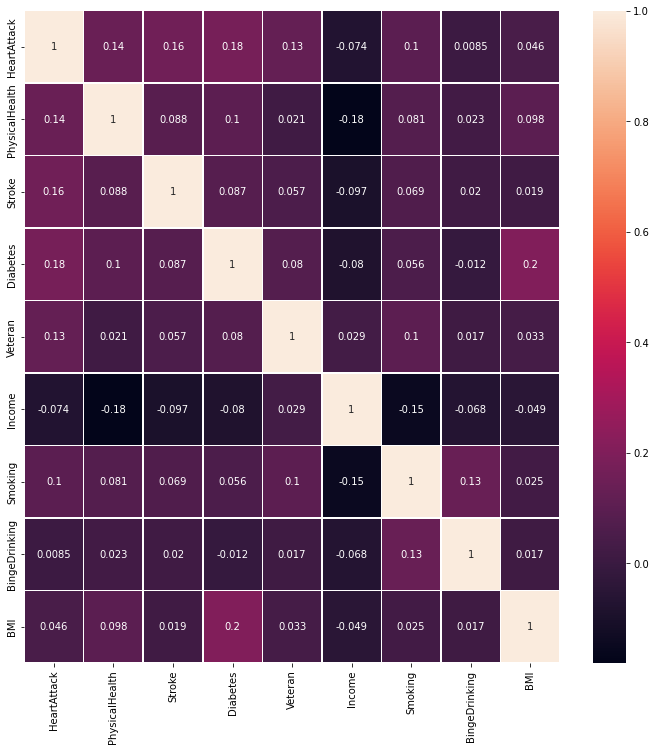

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))


sns.heatmap(df_rel1[['HeartAttack', 'PhysicalHealth', 'Stroke', 'Diabetes', 'Veteran', 'Income', 'Smoking', 'BingeDrinking', 'BMI']].corr(),linewidths=.5, ax=ax, annot=True)

In [ ]:
#States categorized into 5 different regions based on their locations

east = [9,10,23,24,25,33,34,36,42,44,50]
midwest = [17,18,19,20,26,27,29,31,38,39,46,55]
west = [4,8,16,30,32,35,41,49,53,56]
south = [1,5,6,11,12,13,21,22,28,37,40,45,47,48,51,54]

#Others include US terrorities or states that is not in mainland USA. (Alaska, Hawaii, Guam, Puerto Rico)
others = [2,15,66,72]

df_rel1["STATE"] = df_rel1["STATE"].replace([east],100)
df_rel1["STATE"] = df_rel1["STATE"].replace([midwest],101)
df_rel1["STATE"] = df_rel1["STATE"].replace([west],102)
df_rel1["STATE"] = df_rel1["STATE"].replace([south],103)
df_rel1["STATE"] = df_rel1["STATE"].replace([others],104)

# Loop to check the relationship of the independent variables with the target variable (Heart Attack) in the form of percentage

In [ ]:
#Filtering the data to just take the cases where the person experienced a heart attack
df_new = df_rel1[df_rel1['HeartAttack'] ==1]

In [ ]:
df_new.reset_index(drop=True)

,STATE,Sex,PhysicalHealth,HealthCare,Exercise,SleepHours,HeartAttack,Stroke,Diabetes,Veteran,Income,Smoking,BingeDrinking,Cancer,CancerType,Race,BMI,BMI_Bucket,SmokerType
0,103.0,1.0,3.0,1.0,1.0,8.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,,1.0,2468.0,2.0,3.0
1,103.0,1.0,3.0,1.0,0.0,7.0,1.0,1.0,0.0,1.0,3.0,0.0,25.0,0.0,,2.0,3148.0,4.0,0.0
2,103.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,,1.0,3515.0,4.0,1.0
3,103.0,1.0,2.0,1.0,0.0,8.0,1.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,,1.0,2580.0,3.0,1.0
4,103.0,1.0,1.0,1.0,1.0,7.0,1.0,0.0,2.0,1.0,8.0,0.0,5.0,0.0,,2.0,3298.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,102.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,,6.0,2672.0,3.0,0.0
864,102.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,,1.0,2437.0,2.0,0.0
865,102.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,,1.0,2412.0,2.0,0.0
866,102.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,,1.0,2750.0,3.0,1.0


In [ ]:
df_sampled = df_rel1.sample(frac = 0.1, random_state = 42)
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 9137 to 26379
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           1405 non-null   float64
 1   Sex             1405 non-null   float64
 2   PhysicalHealth  1405 non-null   float64
 3   HealthCare      1405 non-null   float64
 4   Exercise        1405 non-null   float64
 5   SleepHours      1405 non-null   float64
 6   HeartAttack     1405 non-null   float64
 7   Stroke          1405 non-null   float64
 8   Diabetes        1405 non-null   float64
 9   Veteran         1405 non-null   float64
 10  Income          1405 non-null   float64
 11  Smoking         1405 non-null   float64
 12  BingeDrinking   1405 non-null   float64
 13  Cancer          1405 non-null   float64
 14  CancerType      1405 non-null   object 
 15  Race            1405 non-null   float64
 16  BMI             1405 non-null   float64
 17  BMI_Bucket      1405 non-null

In [ ]:
df_sampled

,STATE,Sex,PhysicalHealth,HealthCare,Exercise,SleepHours,HeartAttack,Stroke,Diabetes,Veteran,Income,Smoking,BingeDrinking,Cancer,CancerType,Race,BMI,BMI_Bucket,SmokerType
9137,102.0,2.0,2.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,,1.0,2663.0,3.0,1.0
36600,102.0,1.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,,1.0,2584.0,3.0,0.0
32586,102.0,1.0,3.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,2.0,1.0,6.0,0.0,,1.0,2687.0,3.0,1.0
12564,102.0,2.0,2.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,,6.0,3132.0,4.0,2.0
19271,102.0,2.0,2.0,1.0,0.0,7.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0,0.0,,1.0,4269.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11572,102.0,1.0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,,2.0,2712.0,3.0,1.0
35755,102.0,1.0,2.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,,1.0,2720.0,3.0,0.0
13571,102.0,1.0,1.0,1.0,1.0,8.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,,1.0,2639.0,3.0,0.0
32572,102.0,2.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,8.0,1.0,3.0,0.0,,1.0,2506.0,3.0,3.0


In [ ]:
X = df_sampled.drop(columns=['HeartAttack','CancerType'])
y = df_sampled['HeartAttack']

In [ ]:
X

,STATE,Sex,PhysicalHealth,HealthCare,Exercise,SleepHours,Stroke,Diabetes,Veteran,Income,Smoking,BingeDrinking,Cancer,Race,BMI,BMI_Bucket,SmokerType
9137,102.0,2.0,2.0,1.0,0.0,7.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0,2663.0,3.0,1.0
36600,102.0,1.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,1.0,2584.0,3.0,0.0
32586,102.0,1.0,3.0,1.0,1.0,6.0,0.0,0.0,1.0,2.0,1.0,6.0,0.0,1.0,2687.0,3.0,1.0
12564,102.0,2.0,2.0,1.0,1.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,6.0,3132.0,4.0,2.0
19271,102.0,2.0,2.0,1.0,0.0,7.0,0.0,2.0,0.0,6.0,1.0,0.0,0.0,1.0,4269.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11572,102.0,1.0,1.0,1.0,1.0,7.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,2.0,2712.0,3.0,1.0
35755,102.0,1.0,2.0,1.0,1.0,7.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,1.0,2720.0,3.0,0.0
13571,102.0,1.0,1.0,1.0,1.0,8.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,2639.0,3.0,0.0
32572,102.0,2.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,8.0,1.0,3.0,0.0,1.0,2506.0,3.0,3.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 9137 to 26379
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           1405 non-null   float64
 1   Sex             1405 non-null   float64
 2   PhysicalHealth  1405 non-null   float64
 3   HealthCare      1405 non-null   float64
 4   Exercise        1405 non-null   float64
 5   SleepHours      1405 non-null   float64
 6   Stroke          1405 non-null   float64
 7   Diabetes        1405 non-null   float64
 8   Veteran         1405 non-null   float64
 9   Income          1405 non-null   float64
 10  Smoking         1405 non-null   float64
 11  BingeDrinking   1405 non-null   float64
 12  Cancer          1405 non-null   float64
 13  Race            1405 non-null   float64
 14  BMI             1405 non-null   float64
 15  BMI_Bucket      1405 non-null   float64
 16  SmokerType      1405 non-null   float64
dtypes: float64(17)
memory usage: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, roc_curve, auc

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X.sample(5)

,STATE,Sex,PhysicalHealth,HealthCare,Exercise,SleepHours,Stroke,Diabetes,Veteran,Income,Smoking,BingeDrinking,Cancer,Race,BMI,BMI_Bucket,SmokerType
16290,102.0,2.0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,6.0,2053.0,2.0,0.0
20084,103.0,2.0,1.0,1.0,1.0,8.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,2663.0,3.0,1.0
16407,102.0,1.0,1.0,1.0,0.0,8.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,1.0,3087.0,4.0,1.0
28968,103.0,1.0,2.0,1.0,1.0,7.0,0.0,0.0,0.0,8.0,1.0,2.0,0.0,1.0,2875.0,3.0,1.0
17104,102.0,1.0,2.0,1.0,1.0,8.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,2732.0,3.0,0.0


In [ ]:
y

9137     1.0
36600    0.0
32586    0.0
12564    0.0
19271    0.0
        ... 
11572    0.0
35755    0.0
13571    0.0
32572    0.0
26379    0.0
Name: HeartAttack, Length: 1405, dtype: float64

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size= 0.30, random_state=0)  
x_train.shape, x_test.shape

((983, 17), (422, 17))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_estimators=100, oob_score=True)


In [ ]:
%%time
classifier_rf.fit(x_train,y_train)

CPU times: user 272 ms, sys: 1.89 ms, total: 274 ms
Wall time: 280 ms


RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
# Use the forest's predict method on the test data
y_pred = classifier_rf.predict(x_test)

In [ ]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
#classifier_rf.oob_score_

0.9348931841302136

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.9360189573459715

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       394
         1.0       0.67      0.07      0.13        28

    accuracy                           0.94       422
   macro avg       0.80      0.53      0.55       422
weighted avg       0.92      0.94      0.91       422



In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**.5
print("Root mean square error is:- ",rmse)

Root mean square error is:-  0.25294474229370423
